In [2]:
import pymaid
rm = pymaid.connect_catmaid()

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [14]:
da1 = pymaid.get_neuron('annotation:glomerulus DA1 right')
da1

,type,name,skeleton_id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,CatmaidNeuron,Uniglomerular mALT DA1 lPN 57316 2863105 ML,2863104,6774,470,280,None,1522064.50,[3245741],1 nanometer
1,CatmaidNeuron,Uniglomerular mALT DA1 lPN 57382 ML,57381,8243,382,195,None,1337348.75,[3364368],1 nanometer
2,CatmaidNeuron,Uniglomerular mALT DA1 lPN 61222 AJ,61221,8578,556,199,None,1353478.75,[3254492],1 nanometer
3,CatmaidNeuron,Uniglomerular mALT DA1 lPN 57354 GA,57353,6985,370,225,None,1539364.25,[3254736],1 nanometer
4,CatmaidNeuron,Uniglomerular mALT DA1 lPN 57324 LK JSL,57323,6223,481,256,None,1483462.50,[3251355],1 nanometer
5,CatmaidNeuron,Uniglomerular mALT DA1 lPN 57358 IJA,755022,7453,515,230,None,1401414.75,[3252148],1 nanometer
6,CatmaidNeuron,Uniglomerular mALT DA1 lPN 27296 BH,27295,10216,507,304,None,1806000.25,[3005291],1 nanometer
7,CatmaidNeuron,Uniglomerular mlALT DA1 vPN mlALTed Milk 18114...,1811442,11769,804,378,None,2169807.25,[6838672],1 nanometer
8,CatmaidNeuron,Uniglomerular mALT DA1 lPN 57312 LK,57311,5543,463,211,None,1364103.25,[3059181],1 nanometer


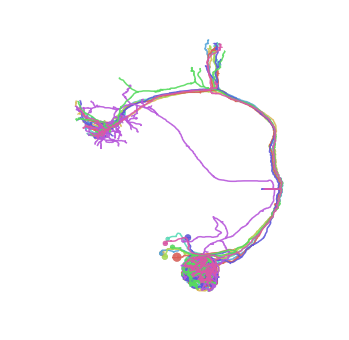

In [26]:
fig, ax = da1.plot2d(lw=1.5)

In [18]:
vol = pymaid.get_volume('v14.neuropil')
vol

<navis.Volume(name=v14.neuropil, color=(120, 120, 120, 0.6), vertices.shape=(8997, 3), faces.shape=(18000, 3))>

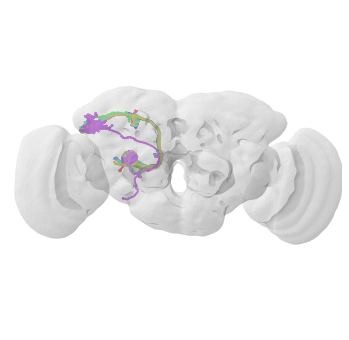

In [25]:
# For visualization we rely on navis
import navis

# Make the volume more transparent
vol.color = (230, 230, 230, .2)

# Plot
fig, ax = navis.plot2d([da1, vol], lw=2)

# Rotate to frontal view
ax.elev = ax.azim = -90
ax.dist = 5

In [31]:
cont = pymaid.get_contributor_statistics(da1)

# `cont` is a pandas.Series containing e.g. nodes contributed
# Let's plot only people with >1000 nodes contributed
{k: v for k, v in cont.node_contributors.items() if v > 1000}

{'harrisonb': 2587,
 'jefferis': 2031,
 'schlegelp': 9977,
 'koppenhaverb': 3355,
 'ratliffj': 2177,
 'hallouc': 3328,
 'robertsr': 14537,
 'masoodpanahn': 1436,
 'kmecoval': 5203,
 'alij': 3740,
 'ranftp': 5930,
 'fisherc': 2286,
 'imtiazs': 2029,
 'adamjohn': 2791,
 'allredg': 1696,
 'michaelLingelbach': 4253}

In [33]:
iinfo = pymaid.get_import_info(da1)
iinfo

Fetching info: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


{'2863104': {'n_imported_treenodes': 1524},
 '57381': {'n_imported_treenodes': 502},
 '61221': {'n_imported_treenodes': 679},
 '57353': {'n_imported_treenodes': 1005},
 '57323': {'n_imported_treenodes': 951},
 '755022': {'n_imported_treenodes': 1271},
 '27295': {'n_imported_treenodes': 1161},
 '1811442': {'n_imported_treenodes': 916},
 '57311': {'n_imported_treenodes': 608}}

In [38]:
rev = pymaid.get_review_details(da1)

# `rev` is a DataFrame that contains timestamps of when a user has reviewed a given node
rev.head(3)

,node_id,imtiazs,masoodpanahn,kmecoval,fisherc,ratliffj,helmickl,alij,sharifin,robertsr,...,meechank,edmondsona,jamasba,schlegelp,calles,hallouc,adesinaa,lovef,mooree,skeleton_id
0,3047214,2016-05-04 21:05:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2863104
1,3047212,2016-05-04 21:05:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2863104
2,3047210,2016-05-04 21:05:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2863104


In [3]:
all_fafb = pymaid.find_neurons(min_size=1000, only_soma=True)

INFO  : Get all neurons with >= 1000 nodes (pymaid)


INFO  : Found 7920 neurons matching the search parameters (pymaid)


In [5]:
all_fafb[:5]

,type,name,skeleton_id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,CatmaidNeuron,PD5g1_L#3 8880132 ECM Tarly family left,8880131,NA,NA,NA,NA,NA,NA,1 nanometer
1,CatmaidNeuron,KCaBx 12719 CF,10190852,NA,NA,NA,NA,NA,NA,1 nanometer
2,CatmaidNeuron,aSP-g type tract crossing alpha lobe neuron 98...,983054,NA,NA,NA,NA,NA,NA,1 nanometer
3,CatmaidNeuron,Uniglomerular mALT VA6 adPN 017 DB,16,NA,NA,NA,NA,NA,NA,1 nanometer
4,CatmaidNeuron,Multiglomerular mALT l2PN VM1+VP2+VP3+23 LTS 0...,32793,NA,NA,NA,NA,NA,NA,1 nanometer


In [6]:
all_fafb[0].nodes.head()

,node_id,parent_id,creator_id,x,y,z,radius,confidence,type
0,38680419,38680415,127,649397.0,128668.0,170760.0,51.0,5,slab
1,38680424,38680419,127,649497.0,128728.0,170840.0,51.0,5,slab
2,38680426,38680424,127,649733.0,128876.0,170920.0,51.0,5,slab
3,38680436,38680432,127,649945.0,129012.0,171040.0,51.0,5,slab
4,38680432,38680426,127,649901.0,128984.0,171000.0,51.0,5,slab


In [7]:
all_fafb[:5]

,type,name,skeleton_id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,CatmaidNeuron,PD5g1_L#3 8880132 ECM Tarly family left,8880131,3129,96,126,None,883607,[38712262],1 nanometer
1,CatmaidNeuron,KCaBx 12719 CF,10190852,NA,NA,NA,NA,NA,NA,1 nanometer
2,CatmaidNeuron,aSP-g type tract crossing alpha lobe neuron 98...,983054,NA,NA,NA,NA,NA,NA,1 nanometer
3,CatmaidNeuron,Uniglomerular mALT VA6 adPN 017 DB,16,NA,NA,NA,NA,NA,NA,1 nanometer
4,CatmaidNeuron,Multiglomerular mALT l2PN VM1+VP2+VP3+23 LTS 0...,32793,NA,NA,NA,NA,NA,NA,1 nanometer


In [ ]:
all_fafb.get_skeletons()

In [ ]:
rm.max_threads = 10